In [1]:
import pandas as pd
import numpy as np
#import prospr as pr
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.lines import Line2D
import seaborn as sns
import random
import csv
from collections import Counter
import itertools
import math
import ast


In [2]:
MoHC = pd.read_json("MOHC2.json")
MoHCFFA = pd.read_json("MOHC_FFA2.json")

In [3]:
for i in range(0, len(MoHC)):
    MoHC.loc[i, 'length'] = 20 + (20 * (( i - (i % 5)) / 5))
for i in range(0, len(MoHCFFA)):
    MoHCFFA.loc[i, 'length'] = 20 + (20 * (( i - (i % 5)) / 5))

In [4]:
MoHC = MoHC.rename(columns={0: "Final Protein", 1: "Fold", 2: "Fitness", 3: "Data"})
MoHCFFA = MoHCFFA.rename(columns={0: "Final Protein", 1: "Fold", 2: "Fitness", 3: "Data"})

In [5]:
MoHCFFA["MinSolution"] = MoHCFFA["Fitness"].apply(lambda x: min(x, key=lambda y: y[1]))
MoHCFFA["MaxSolution"] = MoHCFFA["Fitness"].apply(lambda x: max(x, key=lambda y: y[0]))
MoHC["MinSolution"] = MoHC["Fitness"].apply(lambda x: min(x, key=lambda y: y[1]))
MoHC["MaxSolution"] = MoHC["Fitness"].apply(lambda x: max(x, key=lambda y: y[0]))

In [6]:
MinCol = [i[1] for i in MoHC['MinSolution']]
MinBonds = [i[0]  for i in MoHC['MinSolution']]

MinCol2 = [i[1] for i in MoHCFFA['MinSolution']]
MinBonds2 = [i[0] for i in MoHCFFA['MinSolution']]

In [7]:
mindf = pd.DataFrame({'Col': MinCol, 'Bonds': MinBonds, 'Length': MoHC['length']})
min2df = pd.DataFrame({'Col': MinCol2, 'Bonds': MinBonds2, 'Length': MoHCFFA['length']})


In [8]:
MaxCol = [i[1] for i in MoHC['MaxSolution']]
MaxBonds = [i[0]  for i in MoHC['MaxSolution']]

MaxCol2 = [i[1] for i in MoHCFFA['MaxSolution']]
MaxBonds2 = [i[0] for i in MoHCFFA['MaxSolution']]

In [9]:
maxdf = pd.DataFrame({'Col': MaxCol, 'Bonds': MaxBonds, 'Length': MoHC['length']})
max2df = pd.DataFrame({'Col': MaxCol2, 'Bonds': MaxBonds2, 'Length': MoHCFFA['length']})

In [10]:
ColAll = [i[1] for j in range(0,50) for i in MoHC['Fitness'][j]]
BondsAll = [i[0]  for j in range(0,50) for i in MoHC['Fitness'][j]]

ColAll2 = [i[1] for j in range(0,50) for i in MoHCFFA['Fitness'][j]]
BondsAll2 = [i[0] for j in range(0,50) for i in MoHCFFA['Fitness'][j]]

In [49]:
HClengths = [length for length, fitness in zip(MoHC['length'], MoHC['Fitness']) for _ in fitness]
HCFFAlengths = [length for length, fitness in zip(MoHCFFA['length'], MoHCFFA['Fitness']) for _ in fitness]

In [50]:
HCAll = pd.DataFrame({'Coltest': ColAll, 'Bondstest': BondsAll, 'length': HClengths})
HCFFAAll = pd.DataFrame({'Coltest2': ColAll2, 'Bondstest2': BondsAll2, 'length': HCFFAlengths})

In [12]:
dataFrames = []

for i in range(len(MoHC)):
    # Access the data list for each entry
    data = MoHC["Data"][i]
    
    df = pd.DataFrame(data, columns=['Iteration', 'Fitness'])

    # Find the pair with the minimal second number using a list comprehension
    df["MinSolution"] = df["Fitness"].apply(lambda x: min(x, key=lambda y: y[1]))
    df['MinCol'] = [i[1] for i in df['MinSolution']]
    df['MinBonds'] = [i[0]  for i in df['MinSolution']]


    df = df.drop(['MinSolution', 'Fitness'], axis=1)

    df = df.groupby('Iteration', as_index=False).mean()

    
    # Set 'Iteration' as the index
    df.set_index('Iteration', inplace=True)

    # Reindex the DataFrame to include all iterations
    df = df.reindex(np.arange(0, 100001))

    # Forward fill the missing fitness values
    df['MinBonds'].ffill(inplace=True)
    df['MinCol'].ffill(inplace=True)

    df['length'] = 20 + (20 * (( i - (i % 5)) / 5))

    # Reset the index
    df.reset_index(inplace=True)

    df['length'] = df['length'].astype(int)
        
    # Append the DataFrame to the list
    dataFrames.append(df)

# Concatenate all the DataFrames in the list into a new DataFrame
MoHCMin_Data = pd.concat(dataFrames, ignore_index=True)

In [13]:
dataFrames = []

for i in range(len(MoHCFFA)):
    # Access the data list for each entry
    data = MoHCFFA["Data"][i]
    
    df = pd.DataFrame(data, columns=['Iteration', 'Current' ,'Fitness'])

    # Find the pair with the minimal second number using a list comprehension
    df["MinSolution"] = df["Fitness"].apply(lambda x: min(x, key=lambda y: y[1]))
    df['MinCol'] = [i[1] for i in df['MinSolution']]
    df['MinBonds'] = [i[0]  for i in df['MinSolution']]


    df = df.drop(['MinSolution', 'Fitness', 'Current'], axis=1)

    df = df.groupby('Iteration', as_index=False).mean()

    
    # Set 'Iteration' as the index
    df.set_index('Iteration', inplace=True)

    # Reindex the DataFrame to include all iterations
    df = df.reindex(np.arange(0, 100001))

    # Forward fill the missing fitness values
    df['MinBonds'].ffill(inplace=True)
    df['MinCol'].ffill(inplace=True)

    df['length'] = 20 + (20 * (( i - (i % 5)) / 5))

    # Reset the index
    df.reset_index(inplace=True)

    df['length'] = df['length'].astype(int)
        
    # Append the DataFrame to the list
    dataFrames.append(df)

# Concatenate all the DataFrames in the list into a new DataFrame
MoHCMinFFA_Data = pd.concat(dataFrames, ignore_index=True)

In [14]:
AvgMoHCMinFFA_Data = MoHCMinFFA_Data.groupby(['Iteration', 'length'], as_index=False).agg({'MinBonds':'mean', 'MinCol':'mean'})
AvgMoHCMin_Data = MoHCMin_Data.groupby(['Iteration', 'length'], as_index=False).agg({'MinBonds':'mean', 'MinCol':'mean'})

In [15]:
dataFrames = []

for i in range(len(MoHC)):
    # Access the data list for each entry
    data = MoHC["Data"][i]
    
    df = pd.DataFrame(data, columns=['Iteration', 'Fitness'])

    # Find the pair with the minimal second number using a list comprehension
    df["MaxSolution"] = df["Fitness"].apply(lambda x: max(x, key=lambda y: y[0]))
    df['MaxCol'] = [i[1] for i in df['MaxSolution']]
    df['MaxBonds'] = [i[0]  for i in df['MaxSolution']]


    df = df.drop(['MaxSolution', 'Fitness'], axis=1)

    df = df.groupby('Iteration', as_index=False).mean()

    
    # Set 'Iteration' as the index
    df.set_index('Iteration', inplace=True)

    # Reindex the DataFrame to include all iterations
    df = df.reindex(np.arange(0, 100001))

    # Forward fill the missing fitness values
    df['MaxBonds'].ffill(inplace=True)
    df['MaxCol'].ffill(inplace=True)

    df['length'] = 20 + (20 * (( i - (i % 5)) / 5))

    # Reset the index
    df.reset_index(inplace=True)

    df['length'] = df['length'].astype(int)
        
    # Append the DataFrame to the list
    dataFrames.append(df)

# Concatenate all the DataFrames in the list into a new DataFrame
MoHCMax_Data = pd.concat(dataFrames, ignore_index=True)

In [16]:
dataFrames = []

for i in range(len(MoHCFFA)):
    # Access the data list for each entry
    data = MoHCFFA["Data"][i]
    
    df = pd.DataFrame(data, columns=['Iteration', 'Current' ,'Fitness'])

    # Find the pair with the minimal second number using a list comprehension
    df["MaxSolution"] = df["Fitness"].apply(lambda x: max(x, key=lambda y: y[0]))
    df['MaxCol'] = [i[1] for i in df['MaxSolution']]
    df['MaxBonds'] = [i[0]  for i in df['MaxSolution']]

    df = df.drop(['MaxSolution', 'Fitness', 'Current'], axis=1)

    df = df.groupby('Iteration', as_index=False).mean()

    
    # Set 'Iteration' as the index
    df.set_index('Iteration', inplace=True)

    # Reindex the DataFrame to include all iterations
    df = df.reindex(np.arange(0, 100001))

    # Forward fill the missing fitness values
    df['MaxBonds'].ffill(inplace=True)
    df['MaxCol'].ffill(inplace=True)

    df['length'] = 20 + (20 * (( i - (i % 5)) / 5))

    # Reset the index
    df.reset_index(inplace=True)

    df['length'] = df['length'].astype(int)
        
    # Append the DataFrame to the list
    dataFrames.append(df)

# Concatenate all the DataFrames in the list into a new DataFrame
MoHCMaxFFA_Data = pd.concat(dataFrames, ignore_index=True)

In [17]:
AvgMoHCMaxFFA_Data = MoHCMaxFFA_Data.groupby(['Iteration', 'length'], as_index=False).agg({'MaxBonds':'mean', 'MaxCol':'mean'})
AvgMoHCMax_Data = MoHCMax_Data.groupby(['Iteration', 'length'], as_index=False).agg({'MaxBonds':'mean', 'MaxCol':'mean'})

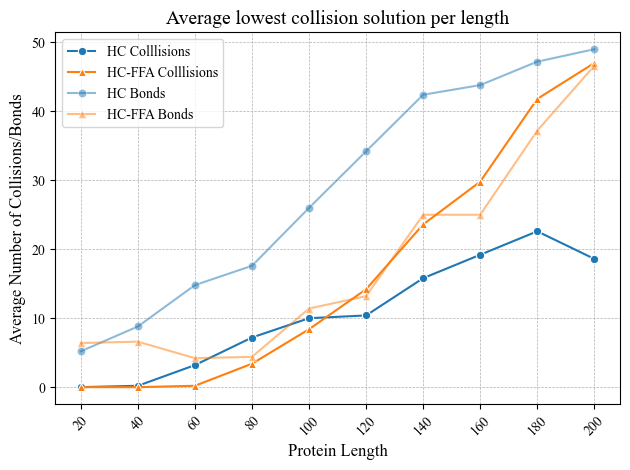

In [39]:
sns.lineplot(x='Length', y='Col', data=mindf, label="HC Colllisions", marker="o", linestyle="-", color="#1f77b4", errorbar=None)
sns.lineplot(x='Length', y='Col', data=min2df, label="HC-FFA Colllisions", marker="^", linestyle="-", color="#ff7f0e", errorbar=None)
sns.lineplot(x='Length', y='Bonds', data=mindf, label="HC Bonds", marker="o", linestyle="-", color="#1f77b4", alpha=0.5, errorbar=None)
sns.lineplot(x='Length', y='Bonds', data=min2df, label="HC-FFA Bonds", marker="^", linestyle="-", color="#ff7f0e", alpha=0.5, errorbar=None)

# Set labels and title
plt.xlabel('Protein Length', fontsize=12)
plt.ylabel('Average Number of Collisions/Bonds', fontsize=12)

plt.legend(loc="upper left", prop={"size": 10})
plt.title('Average lowest collision solution per length', fontsize=14)

plt.xticks(rotation=45)
plt.xticks(range(20,201,20))

# Use a more professional font
plt.rcParams["font.family"] = "Times New Roman"

plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()

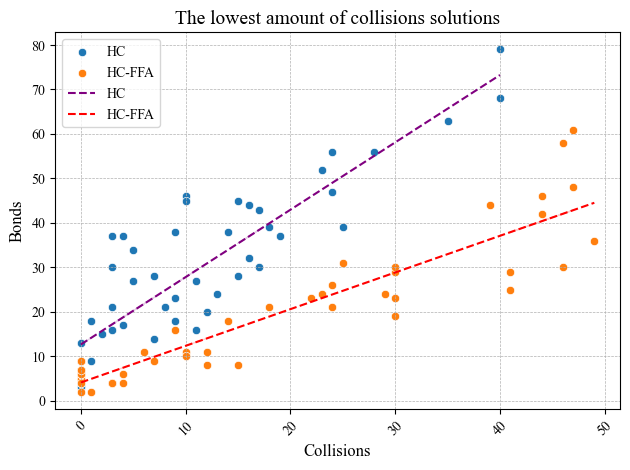

In [19]:
sns.scatterplot(x='Col', y='Bonds', label='HC' ,data=mindf, color=sns.color_palette()[0])
sns.scatterplot(x='Col', y='Bonds', label='HC-FFA' ,data=min2df, color=sns.color_palette()[1])

# Calculate trendline for test
z = np.polyfit(mindf['Col'], mindf['Bonds'], 1)
p = np.poly1d(z)
sns.lineplot(x=mindf['Col'], y=p(mindf['Col']), linestyle="--", label='HC' ,color='purple')

# Calculate trendline for test2
z2 = np.polyfit(min2df['Col'], min2df['Bonds'], 1)
p2 = np.poly1d(z2)
sns.lineplot(x=min2df['Col'], y=p2(min2df['Col']), linestyle="--", label='HC-FFA' ,color='red')

# Set labels and title
plt.xlabel('Collisions', fontsize=12)
plt.ylabel('Bonds', fontsize=12)
plt.legend(loc="upper left", prop={"size": 10})
plt.title('The lowest amount of collisions solutions', fontsize=14)
plt.xticks(rotation=45)
plt.rcParams["font.family"] = "Times New Roman"
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# Show the plot 
plt.tight_layout()
plt.show()

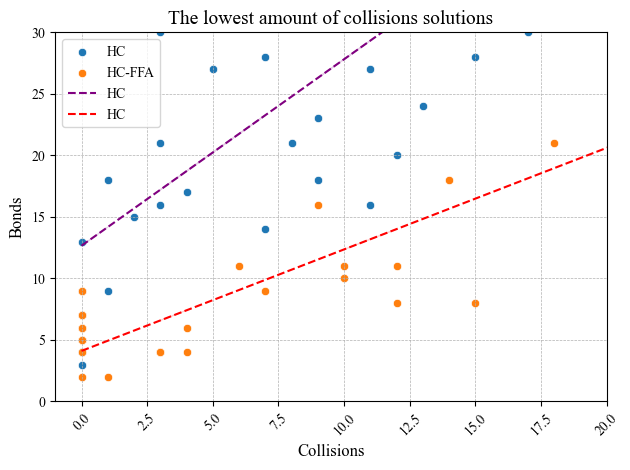

In [27]:
sns.scatterplot(x='Col', y='Bonds', label='HC' ,data=mindf, color=sns.color_palette()[0])
sns.scatterplot(x='Col', y='Bonds', label='HC-FFA' ,data=min2df, color=sns.color_palette()[1])

# Calculate trendline for test
z = np.polyfit(mindf['Col'], mindf['Bonds'], 1)
p = np.poly1d(z)
sns.lineplot(x=mindf['Col'], y=p(mindf['Col']), linestyle="--", label='HC' ,color='purple')

# Calculate trendline for test2
z2 = np.polyfit(min2df['Col'], min2df['Bonds'], 1)
p2 = np.poly1d(z2)
sns.lineplot(x=min2df['Col'], y=p2(min2df['Col']), linestyle="--", label='HC' ,color='red')

# Set labels and title
plt.xlabel('Collisions', fontsize=12)
plt.ylabel('Bonds', fontsize=12)
plt.xlim(-1,20)
plt.ylim(0,30)
plt.legend(loc="upper left", prop={"size": 10})
plt.title('The lowest amount of collisions solutions', fontsize=14)
plt.xticks(rotation=45)
plt.rcParams["font.family"] = "Times New Roman"
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# Show the plot 
plt.tight_layout()
plt.show()

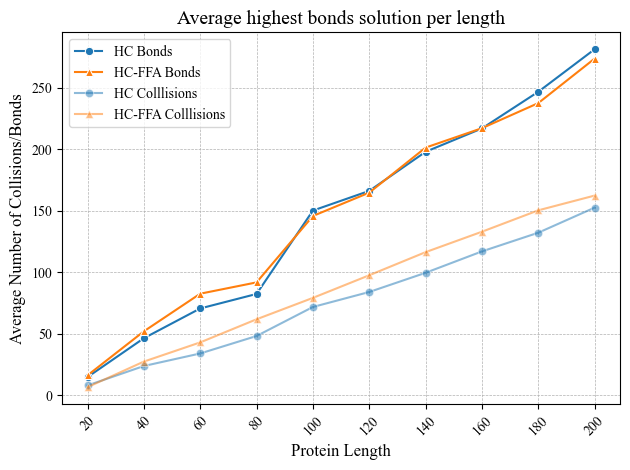

In [40]:

sns.lineplot(x='Length', y='Bonds', data=maxdf, label="HC Bonds", marker="o", linestyle="-", color="#1f77b4", errorbar=None)
sns.lineplot(x='Length', y='Bonds', data=max2df, label="HC-FFA Bonds", marker="^", linestyle="-", color="#ff7f0e", errorbar=None)
sns.lineplot(x='Length', y='Col', data=maxdf, label="HC Colllisions", marker="o", linestyle="-", color="#1f77b4", errorbar=None, alpha=0.5)
sns.lineplot(x='Length', y='Col', data=max2df, label="HC-FFA Colllisions", marker="^", linestyle="-", color="#ff7f0e", errorbar=None, alpha=0.5)

# Set labels and title
plt.xlabel('Protein Length', fontsize=12)
plt.ylabel('Average Number of Collisions/Bonds', fontsize=12)

plt.legend(loc="upper left", prop={"size": 10})
plt.title('Average highest bonds solution per length', fontsize=14)

plt.xticks(rotation=45)
plt.xticks(range(20,201,20))

# Use a more professional font
plt.rcParams["font.family"] = "Times New Roman"

plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()

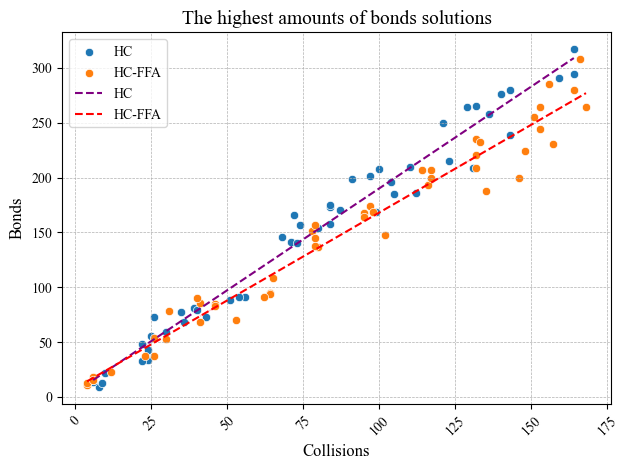

In [22]:
sns.scatterplot(x='Col', y='Bonds', label='HC' ,data=maxdf, color=sns.color_palette()[0])
sns.scatterplot(x='Col', y='Bonds', label='HC-FFA' ,data=max2df, color=sns.color_palette()[1])

# Calculate trendline for test
z = np.polyfit(maxdf['Col'], maxdf['Bonds'], 1)
p = np.poly1d(z)
sns.lineplot(x=maxdf['Col'], y=p(maxdf['Col']), linestyle="--", label='HC' ,color='purple')

# Calculate trendline for test2
z2 = np.polyfit(max2df['Col'], max2df['Bonds'], 1)
p2 = np.poly1d(z2)
sns.lineplot(x=max2df['Col'], y=p2(max2df['Col']), linestyle="--", label='HC-FFA' ,color='red')

# Set labels and title
plt.xlabel('Collisions', fontsize=12)
plt.ylabel('Bonds', fontsize=12)
plt.legend(loc="upper left", prop={"size": 10})
plt.title('The highest amounts of bonds solutions', fontsize=14)
plt.xticks(rotation=45)
plt.rcParams["font.family"] = "Times New Roman"
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# Show the plot 
plt.tight_layout()
plt.show()

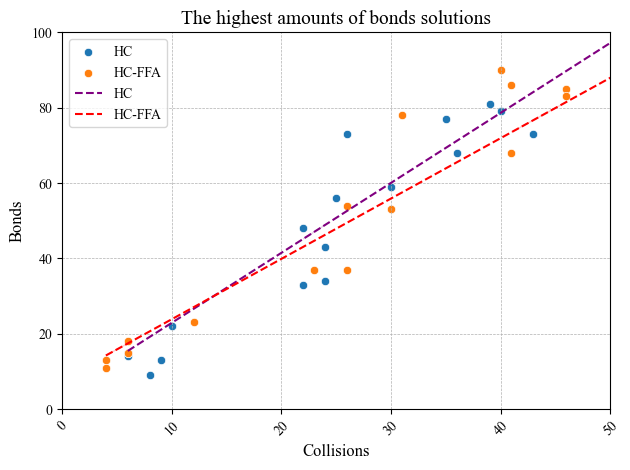

In [23]:
sns.scatterplot(x='Col', y='Bonds', label='HC' ,data=maxdf, color=sns.color_palette()[0])
sns.scatterplot(x='Col', y='Bonds', label='HC-FFA' ,data=max2df, color=sns.color_palette()[1])

# Calculate trendline for test
z = np.polyfit(maxdf['Col'], maxdf['Bonds'], 1)
p = np.poly1d(z)
sns.lineplot(x=maxdf['Col'], y=p(maxdf['Col']), linestyle="--", label='HC' ,color='purple')

# Calculate trendline for test2
z2 = np.polyfit(max2df['Col'], max2df['Bonds'], 1)
p2 = np.poly1d(z2)
sns.lineplot(x=max2df['Col'], y=p2(max2df['Col']), linestyle="--", label='HC-FFA' ,color='red')

# Set labels and title
plt.xlabel('Collisions', fontsize=12)
plt.ylabel('Bonds', fontsize=12)
plt.xlim(0,50)
plt.ylim(0,100)
plt.legend(loc="upper left", prop={"size": 10})
plt.title('The highest amounts of bonds solutions', fontsize=14)
plt.xticks(rotation=45)
plt.rcParams["font.family"] = "Times New Roman"
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# Show the plot 
plt.tight_layout()
plt.show()

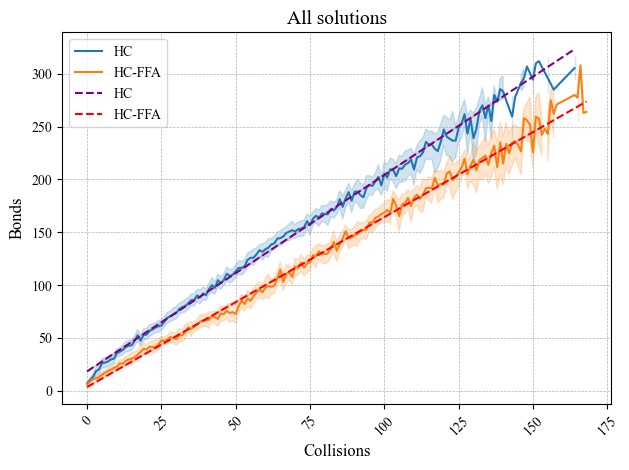

In [24]:
sns.lineplot(x='Coltest', y='Bondstest', label='HC' ,data=HCAll, linestyle="-", color=sns.color_palette()[0])
sns.lineplot(x='Coltest2', y='Bondstest2', label='HC-FFA' ,data=HCFFAAll, linestyle="-", color=sns.color_palette()[1])

# Calculate trendline for test
z = np.polyfit(HCAll['Coltest'], HCAll['Bondstest'], 1)
p = np.poly1d(z)
sns.lineplot(x=HCAll['Coltest'], y=p(HCAll['Coltest']), linestyle="--", label='HC' ,color='purple')

# Calculate trendline for test2
z2 = np.polyfit(HCFFAAll['Coltest2'], HCFFAAll['Bondstest2'], 1)
p2 = np.poly1d(z2)
sns.lineplot(x=HCFFAAll['Coltest2'], y=p2(HCFFAAll['Coltest2']), linestyle="--", label='HC-FFA' ,color='red')

# Set labels and title
plt.xlabel('Collisions', fontsize=12)
plt.ylabel('Bonds', fontsize=12)
plt.legend(loc="upper left", prop={"size": 10})
plt.title('All solutions', fontsize=14)
plt.xticks(rotation=45)
plt.rcParams["font.family"] = "Times New Roman"
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# Show the plot 
plt.tight_layout()
plt.show()

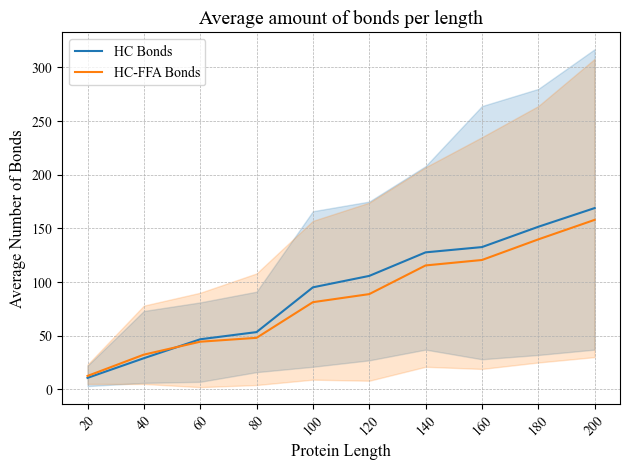

In [59]:

sns.lineplot(x='length', y='Bondstest', data=HCAll, label="HC Bonds", linestyle="-", color="#1f77b4", errorbar=("pi",100))
sns.lineplot(x='length', y='Bondstest2', data=HCFFAAll, label="HC-FFA Bonds", linestyle="-", color="#ff7f0e", errorbar=("pi",100))

# Set labels and title
plt.xlabel('Protein Length', fontsize=12)
plt.ylabel('Average Number of Bonds', fontsize=12)

plt.legend(loc="upper left", prop={"size": 10})
plt.title('Average amount of bonds per length', fontsize=14)

plt.xticks(rotation=45)
plt.xticks(range(20,201,20))

# Use a more professional font
plt.rcParams["font.family"] = "Times New Roman"

plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()

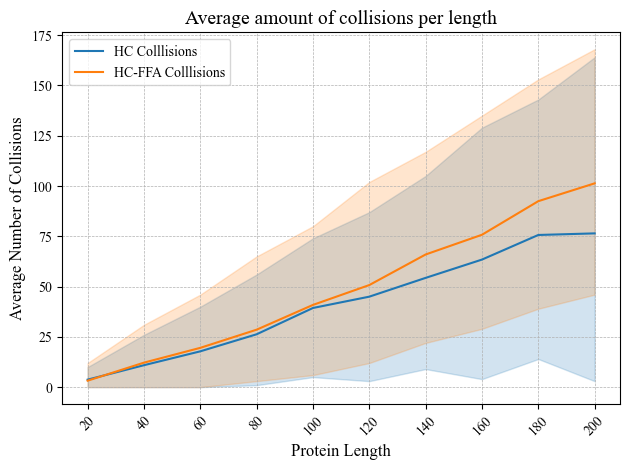

In [60]:
sns.lineplot(x='length', y='Coltest', data=HCAll, label="HC Colllisions", linestyle="-", color="#1f77b4", errorbar=("pi",100))
sns.lineplot(x='length', y='Coltest2', data=HCFFAAll, label="HC-FFA Colllisions", linestyle="-", color="#ff7f0e", errorbar=("pi",100))

# Set labels and title
plt.xlabel('Protein Length', fontsize=12)
plt.ylabel('Average Number of Collisions', fontsize=12)

plt.legend(loc="upper left", prop={"size": 10})
plt.title('Average amount of collisions per length', fontsize=14)

plt.xticks(rotation=45)
plt.xticks(range(20,201,20))

# Use a more professional font
plt.rcParams["font.family"] = "Times New Roman"

plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()

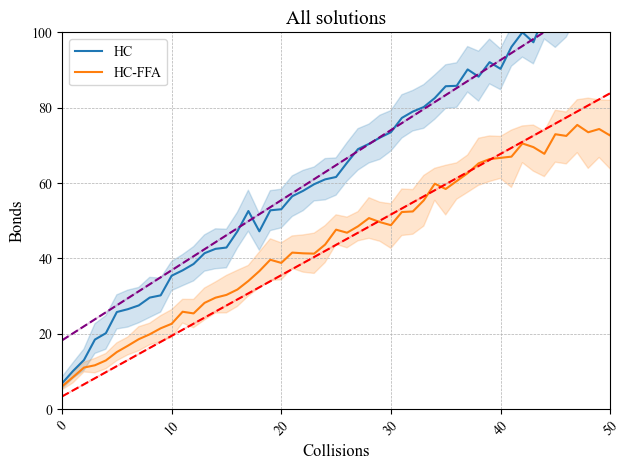

In [61]:
sns.lineplot(x='Coltest', y='Bondstest', label='HC' ,data=HCAll, linestyle="-", color=sns.color_palette()[0])
sns.lineplot(x='Coltest2', y='Bondstest2', label='HC-FFA' ,data=HCFFAAll, linestyle="-", color=sns.color_palette()[1])

# Calculate trendline for test
z = np.polyfit(HCAll['Coltest'], HCAll['Bondstest'], 1)
p = np.poly1d(z)
sns.lineplot(x=HCAll['Coltest'], y=p(HCAll['Coltest']), linestyle="--", color='purple')

# Calculate trendline for test2
z2 = np.polyfit(HCFFAAll['Coltest2'], HCFFAAll['Bondstest2'], 1)
p2 = np.poly1d(z2)
sns.lineplot(x=HCFFAAll['Coltest2'], y=p2(HCFFAAll['Coltest2']), linestyle="--", color='red')

# Set labels and title
plt.xlabel('Collisions', fontsize=12)
plt.ylabel('Bonds', fontsize=12)
plt.xlim(0,50)
plt.ylim(0,100)
plt.legend(loc="upper left", prop={"size": 10})
plt.title('All solutions', fontsize=14)
plt.xticks(rotation=45)
plt.rcParams["font.family"] = "Times New Roman"
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# Show the plot 
plt.tight_layout()
plt.show()

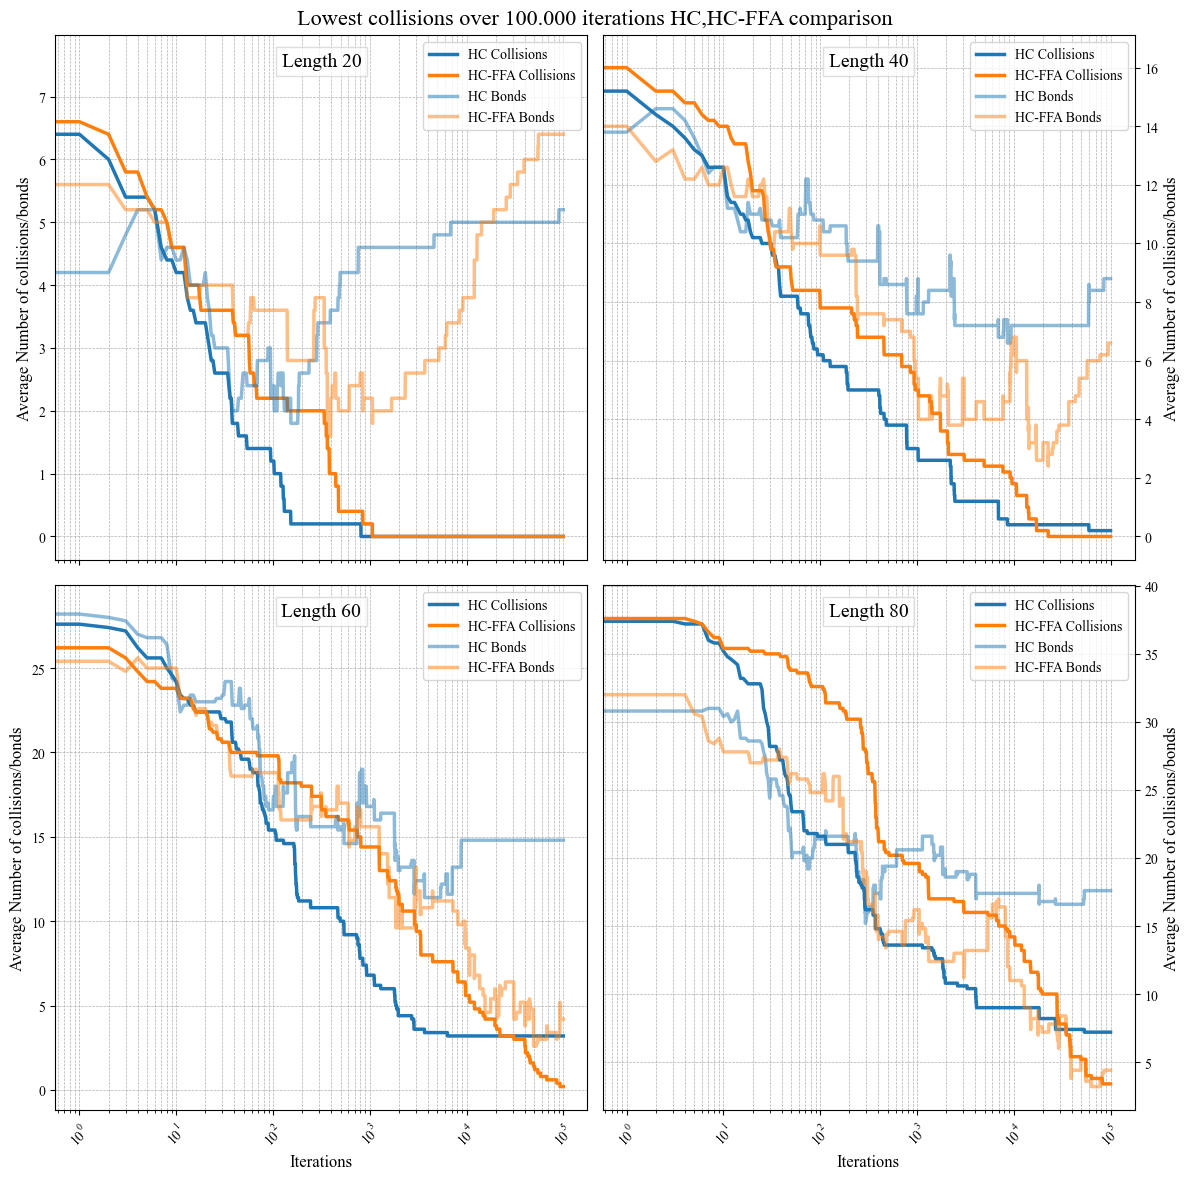

In [31]:
lengths = [20, 40, 60, 80]

# Increase figure size
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Add a figure title
fig.suptitle('Lowest collisions over 100.000 iterations HC,HC-FFA comparison', fontsize=16)

for i, length in enumerate(lengths):
    row = i // 2
    col = i % 2
    sns.lineplot(x='Iteration', y='MinCol', data=AvgMoHCMin_Data[AvgMoHCMin_Data['length'] == length], label='HC Collisions', linestyle="-", ax=axs[row, col], linewidth=2.5)
    sns.lineplot(x='Iteration', y='MinCol', data=AvgMoHCMinFFA_Data[AvgMoHCMinFFA_Data['length'] == length], label='HC-FFA Collisions', linestyle="-", ax=axs[row, col], linewidth=2.5)
    sns.lineplot(x='Iteration', y='MinBonds', data=AvgMoHCMin_Data[AvgMoHCMin_Data['length'] == length], label='HC Bonds', linestyle="-", ax=axs[row, col], linewidth=2.5, color=sns.color_palette()[0], alpha=0.5)
    sns.lineplot(x='Iteration', y='MinBonds', data=AvgMoHCMinFFA_Data[AvgMoHCMinFFA_Data['length'] == length], label='HC-FFA Bonds', linestyle="-", ax=axs[row, col], linewidth=2.5, color=sns.color_palette()[1], alpha=0.5)
    
    axs[row, col].set_ylabel('Average Number of collisions/bonds', fontsize=12)
    axs[row, col].legend(loc="upper right", prop={"size": 10})
    axs[row, col].set_xscale('log')
    axs[row, col].text(0.5, 0.95, f'Length {length}', fontsize=14, ha='center', va='center', transform=axs[row, col].transAxes, bbox=dict(facecolor='white', alpha=0.75, edgecolor='lightgrey'))
    axs[row, col].tick_params(axis='x', rotation=45)
    axs[row, col].grid(True, which="both", linestyle="--", linewidth=0.5)

    # Remove x-axis label and values for the top graphs
    if row == 0:
        axs[row, col].set_xlabel('')
        axs[row, col].set_xticklabels([])
    else:
        axs[row, col].set_xlabel('Iterations', fontsize=12)

    # Move y-axis to right for the right graphs
    if col == 1:
        axs[row, col].yaxis.tick_right()
        axs[row, col].yaxis.set_label_position("right")

plt.tight_layout()
plt.show()


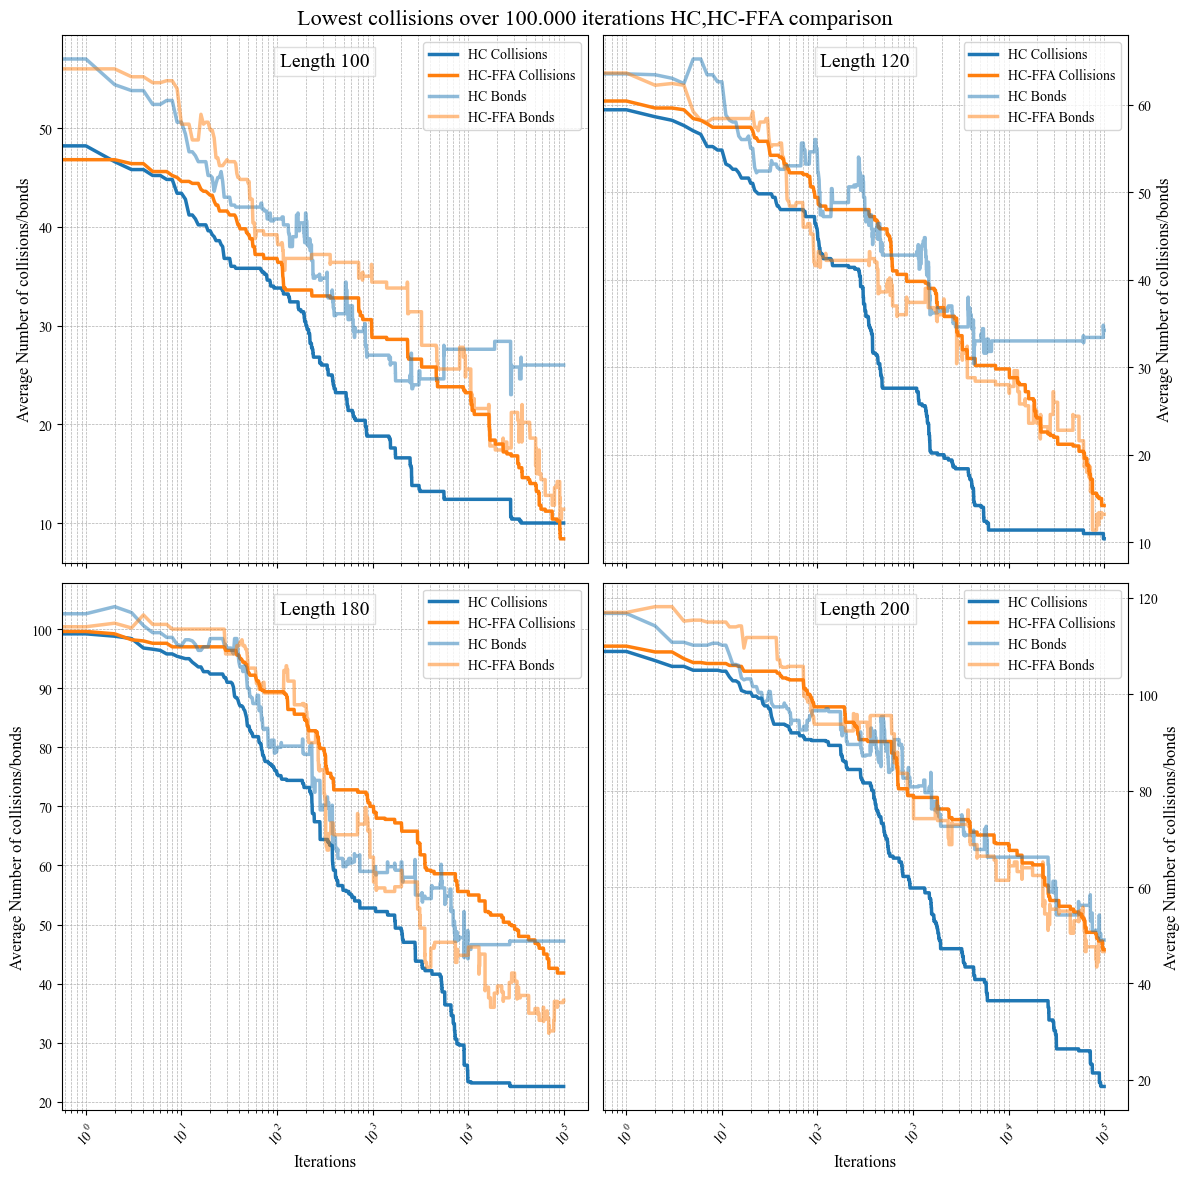

In [66]:
lengths = [100, 120, 180, 200]

# Increase figure size
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Add a figure title
fig.suptitle('Lowest collisions over 100.000 iterations HC,HC-FFA comparison', fontsize=16)

for i, length in enumerate(lengths):
    row = i // 2
    col = i % 2
    sns.lineplot(x='Iteration', y='MinCol', data=AvgMoHCMin_Data[AvgMoHCMin_Data['length'] == length], label='HC Collisions', linestyle="-", ax=axs[row, col], linewidth=2.5)
    sns.lineplot(x='Iteration', y='MinCol', data=AvgMoHCMinFFA_Data[AvgMoHCMinFFA_Data['length'] == length], label='HC-FFA Collisions', linestyle="-", ax=axs[row, col], linewidth=2.5)
    sns.lineplot(x='Iteration', y='MinBonds', data=AvgMoHCMin_Data[AvgMoHCMin_Data['length'] == length], label='HC Bonds', linestyle="-", ax=axs[row, col], linewidth=2.5, color=sns.color_palette()[0], alpha=0.5)
    sns.lineplot(x='Iteration', y='MinBonds', data=AvgMoHCMinFFA_Data[AvgMoHCMinFFA_Data['length'] == length], label='HC-FFA Bonds', linestyle="-", ax=axs[row, col], linewidth=2.5, color=sns.color_palette()[1], alpha=0.5)
    
    axs[row, col].set_ylabel('Average Number of collisions/bonds', fontsize=12)
    axs[row, col].legend(loc="upper right", prop={"size": 10})
    axs[row, col].set_xscale('log')
    axs[row, col].text(0.5, 0.95, f'Length {length}', fontsize=14, ha='center', va='center', transform=axs[row, col].transAxes, bbox=dict(facecolor='white', alpha=0.75, edgecolor='lightgrey'))
    axs[row, col].tick_params(axis='x', rotation=45)
    axs[row, col].grid(True, which="both", linestyle="--", linewidth=0.5)

    # Remove x-axis label and values for the top graphs
    if row == 0:
        axs[row, col].set_xlabel('')
        axs[row, col].set_xticklabels([])
    else:
        axs[row, col].set_xlabel('Iterations', fontsize=12)
    if col == 1:
        axs[row, col].yaxis.tick_right()
        axs[row, col].yaxis.set_label_position("right")

plt.tight_layout()
plt.show()


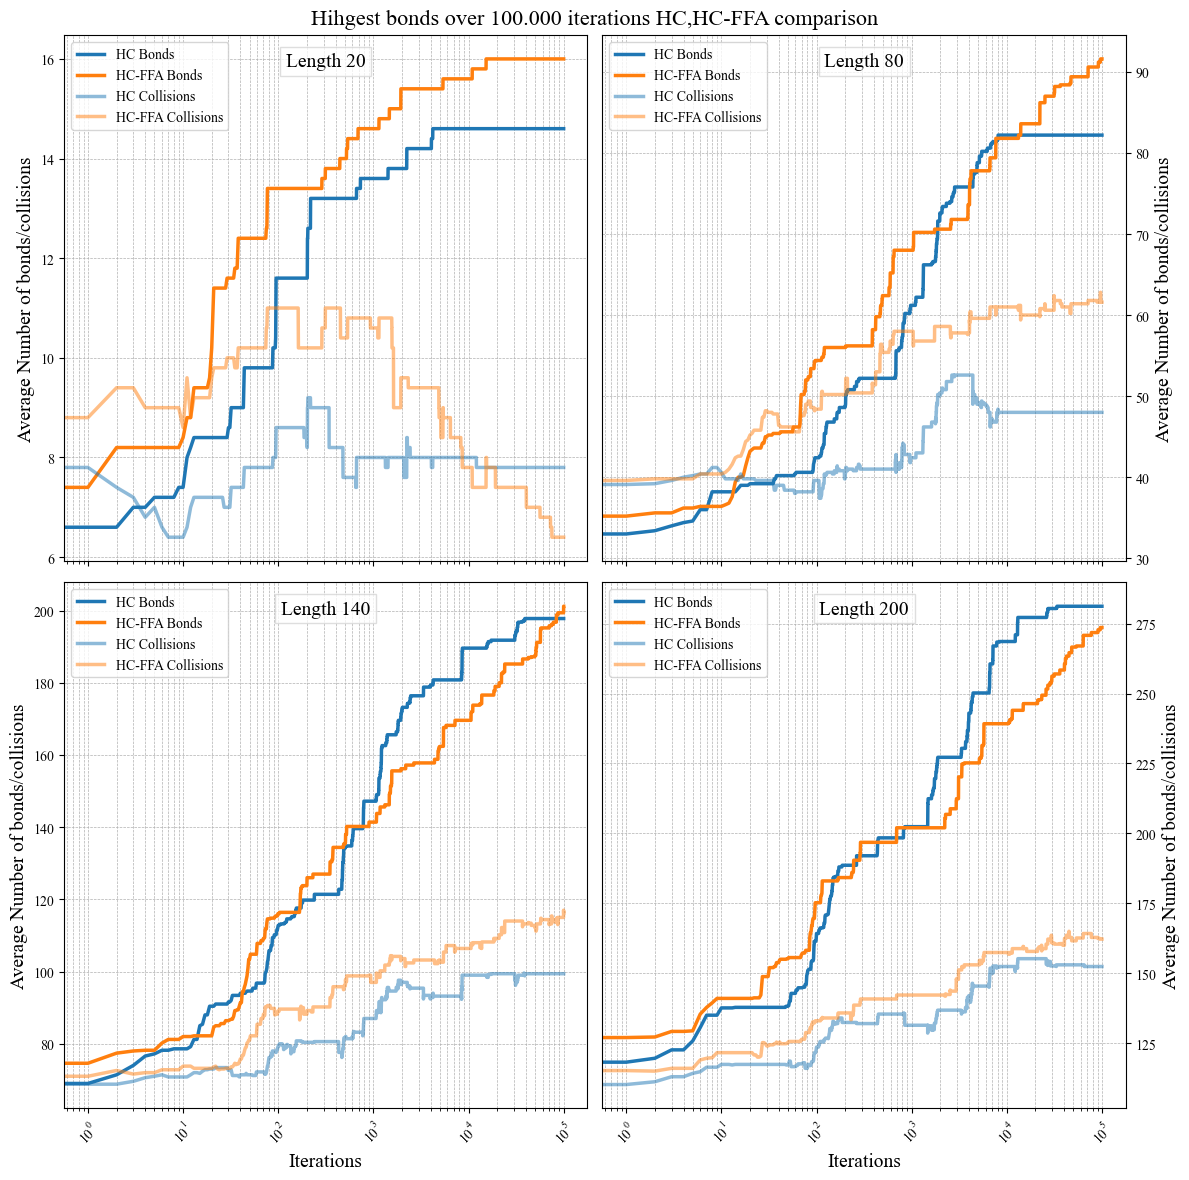

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns


lengths = [20, 80, 140, 200]

# Increase figure size
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Add a figure title
fig.suptitle('Hihgest bonds over 100.000 iterations HC,HC-FFA comparison', fontsize=16)

for i, length in enumerate(lengths):
    row = i // 2
    col = i % 2
    sns.lineplot(x='Iteration', y='MaxBonds', data=AvgMoHCMax_Data[AvgMoHCMax_Data['length'] == length], label='HC Bonds', linestyle="-", ax=axs[row, col], linewidth=2.5)
    sns.lineplot(x='Iteration', y='MaxBonds', data=AvgMoHCMaxFFA_Data[AvgMoHCMaxFFA_Data['length'] == length], label='HC-FFA Bonds', linestyle="-", ax=axs[row, col], linewidth=2.5)
    sns.lineplot(x='Iteration', y='MaxCol', data=AvgMoHCMax_Data[AvgMoHCMax_Data['length'] == length], label='HC Collisions', linestyle="-", ax=axs[row, col], linewidth=2.5, color=sns.color_palette()[0], alpha=0.5)
    sns.lineplot(x='Iteration', y='MaxCol', data=AvgMoHCMaxFFA_Data[AvgMoHCMaxFFA_Data['length'] == length], label='HC-FFA Collisions', linestyle="-", ax=axs[row, col], linewidth=2.5, color=sns.color_palette()[1], alpha=0.5)

    axs[row, col].set_ylabel('Average Number of bonds/collisions', fontsize=14)
    axs[row, col].legend(loc="upper left", prop={"size": 10})
    axs[row, col].set_xscale('log')
    axs[row, col].text(0.5, 0.95, f'Length {length}', fontsize=14, ha='center', va='center', transform=axs[row, col].transAxes, bbox=dict(facecolor='white', alpha=0.75, edgecolor='lightgrey'))
    axs[row, col].tick_params(axis='x', rotation=45)
    axs[row, col].grid(True, which="both", linestyle="--", linewidth=0.5)

    # Remove x-axis label and values for the top graphs
    if row == 0:
        axs[row, col].set_xlabel('')
        axs[row, col].set_xticklabels([])
    else:
        axs[row, col].set_xlabel('Iterations', fontsize=14)
    if col == 1:
        axs[row, col].yaxis.tick_right()
        axs[row, col].yaxis.set_label_position("right")

plt.tight_layout()
plt.show()
